0

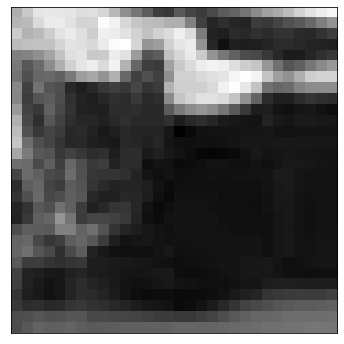

In [95]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

cat = plt.imread("Group_8/Group_8/train/cat/0000.jpg") #first image in  training data of "cat" category
cat = cv2.cvtColor(cat, cv2.COLOR_BGR2GRAY)

def normal_kernel(size=3, dev=0.3):
    normal = np.linspace(-(size - 1)/2., (size - 1)/2., size) 
    spread = np.exp(-0.5*np.square(normal)/np.square(dev)) #1D gaussian
    kernel = np.outer(spread, spread) #2D gaussian
    #size*size matrix
    return kernel/np.sum(kernel)

def show_image(img):
    plt.figure(figsize=(6, 6))
    plt.imshow(img, cmap='gray')
    plt.xticks([]), plt.yticks([])
    return 0

G = normal_kernel()
    
def convolve(img, kernel, stride=1, padding=0):
    
    M,N = img.shape
    #print(M,N)
    def pad_image(img, padding_width):
        img_with_padding = np.zeros(shape=(
            M + padding_width*2,  
            N + padding_width*2
            ))
        
        img_with_padding[padding_width:-padding_width, padding_width:-padding_width] = img #only change inner elements of empty array
        
        return img_with_padding
    
    if padding:
        img = pad_image(img, padding)
        
    eps = 1e-12
    m,n = img.shape
    p,q = kernel.shape
    
    final = np.zeros((m,n))
    
    for i in range(0, m-p+1):
        
        for j in range(0, n-q+1, stride):
            
            sub = img[i:i+p, j:j+q] #part of image
            result = np.multiply(sub, kernel) #element-wise multiplication of kernel and part of image
            
            #print(result.shape)
            final[i,j] = np.sum(result) + eps #eps converts non-zero values for reshaping
            
    
    final = final[final != 0]
    s1 = int((M-p+2*padding)/stride + 1)
    s2 = int((N-q+2*padding)/stride + 1)
    #print(s1,s2)
    final = final.reshape((s1,s2))
    
    return final

blurred_cat = convolve(cat, G)
show_image(blurred_cat)  

In [100]:
import os

cat = plt.imread("cat.jpeg").T #first image in  training data of "cat" category
    
def convolve_3d(img, padding=0,stride=1):
        
        K,M,N = img.shape
        #print(M,N,K)
        eps = 1e-12
        kernel =[]
        for i in range(K):
            kernel.append(normal_kernel(size=3, dev=0.3))
        kernel = np.array(kernel)
        k,p,q = kernel.shape
        final = np.zeros((M,N))
        for i in range(0, M-p+1):
        
            for j in range(0, N-q+1, stride):
                temp = []
                for depth in range(K):
                    temp.append(img[depth][i:i+p, j:j+q]) #part of image
                temp = np.array(temp)
                result  = np.multiply(temp, kernel) #element-wise multiplication of kernel and part of image
                
                final[i,j] = np.sum(result) + eps #eps converts non-zero values for reshaping

        final = final[final != 0]
        s1 = int((M-p+2*padding)/stride + 1)
        s2 = int((N-q+2*padding)/stride + 1)
        
        final = final.reshape((s1,s2))
        #print(final.shape)
        return final
#convolve_3d(cat,32)

In [102]:

class Conv:
    def __init__(self, num_filters):
        self.num_filters = num_filters
    
    def conv_with_relu(self, img, stride=1, padding=0):
        ft_map = []
        
        for i in range(self.num_filters):
            #normal Kernel defined in part 1
            kernel = normal_kernel(3, 0.3)
            
            ft_map.append(convolve_3d(img, stride=1, padding=0))
            #print(np.array(ft_map))
        ft_map = np.array(ft_map)
        #ReLU activation function to provide non linearity
        for feature in ft_map:
            for w in range(len(feature)):
                for h in range(len(feature[0])):
                    feature[w][h] = max(0, feature[w][h])
        
        return ft_map
            
            
        
        
part2 = Conv(32)
ft_map = part2.conv_with_relu(cat)
print("For 1st Conv Layer,")
print("Calculated Shape is : (32, 30,30), W=32, F=3, P=0, S=1")
print("Ouput shape is : ",ft_map.shape)



For 1st Conv Layer,
Calculated Shape is : (32, 30,30), W=32, F=3, P=0, S=1
Ouput shape is :  (32, 199, 249)


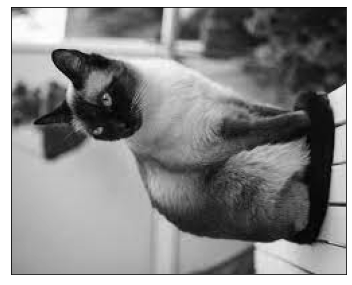

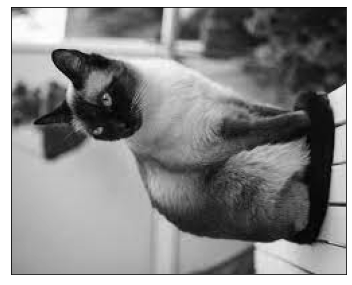

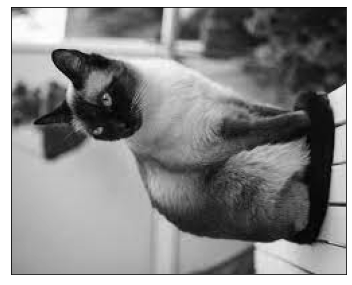

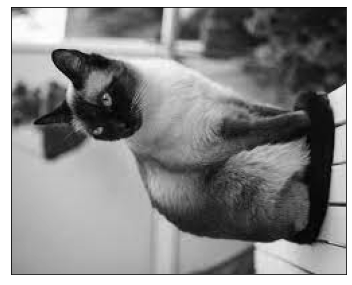

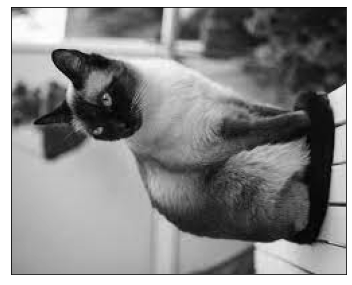

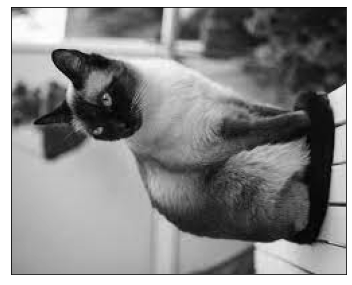

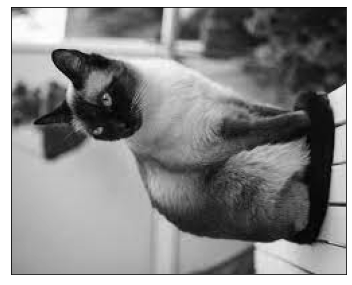

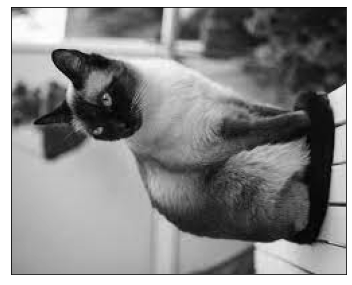

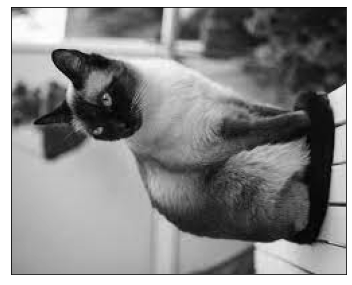

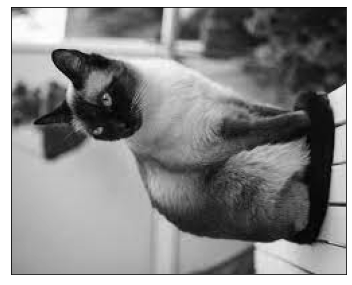

In [103]:
for i in range(10):
    show_image(ft_map[i])